# Deutsch experiments

In [1]:
from qiskit import  QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()

/Users/iuliazidaru/Documents/workspace/quantum-playground/venv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
def execute_circuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc, backend, shots=1024).result().get_counts()
    print(results)
    display(plot_histogram(results))

In [7]:
import qiskit.tools.jupyter

In [8]:
#Import the least_busy module and enable Qiskit job #watcher

from qiskit.providers.ibmq import least_busy

%qiskit_job_watcher

#Identify the least busy devices
backend_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 2 and not x.configuration().simulator)

# Assign least busy device to backend
backend = least_busy(backend_devices)

#Print the least busy device
print('The least busy device: {}'.format(least_busy(backend_devices)))


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

The least busy device: ibmqx2


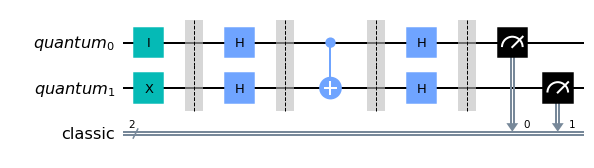

{'11': 1024}


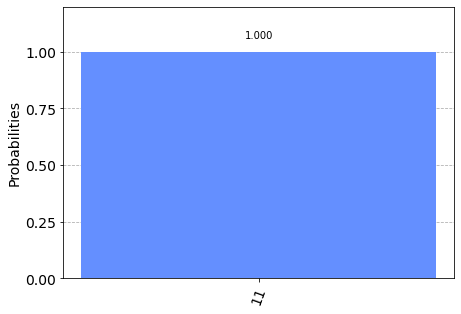

In [5]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.i(0)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0, 1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.measure(quantum_register, classic_register)
display(qc.draw(output="mpl"))
execute_circuit(qc)
